In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Google colab/alexa_reviews.tsv",sep="\t")
#to show first 5 records
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [3]:
df.shape #no.of rows and columns

(3150, 3)

In [4]:
#check null value
df.isnull().sum()

Unnamed: 0          0
verified_reviews    0
feedback            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   verified_reviews  3150 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.0+ KB


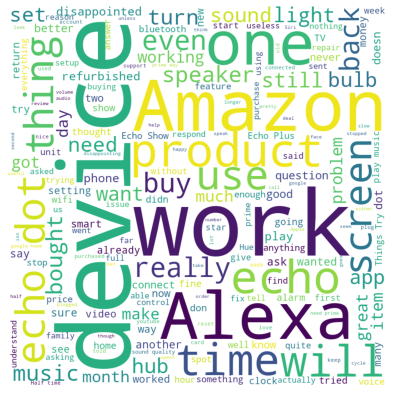

In [6]:
#Create word cloud for -ve sentiment means -ve sentence means bad review
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Create object of WordCloud class
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(df[df["feedback"]==0]["verified_reviews"]))

plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

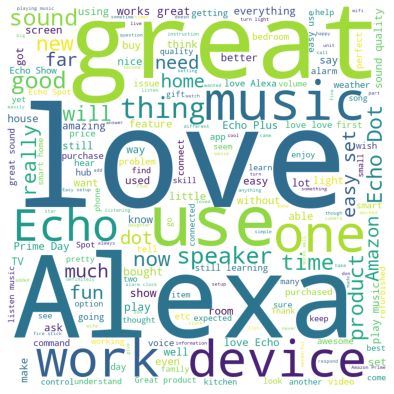

In [7]:
#Create object of WordCloud class  for +ve sentence/review
wc1 = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc1.generate(''.join(df[df["feedback"]==1]["verified_reviews"]))

plt.figure(figsize = (7,7)) 
plt.imshow(wc1) 
plt.axis("off") 
plt.show()

In [8]:
#text preprocessing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [9]:
import nltk

In [10]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# data cleaning function create for clean the document
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [12]:
#call function 
df["verified_reviews"]=df["verified_reviews"].apply(clean_text)

In [13]:
#to check review column
df["verified_reviews"].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    i lot fun thing my yr old learns dinosaur cont...
4                                                music
Name: verified_reviews, dtype: object

In [14]:
#separate input and output from dataset
X = df['verified_reviews'] #input
Y = df["feedback"] #output

In [15]:
#train test split (70-30%  , 75-25% and 80%-20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [16]:
#no. of words in given senetence
sent_len=[] #user defined empty list declare
for sent in df['verified_reviews']:
    sent_len.append(len(word_tokenize(sent)))
#to add new column in existing dataset
df['sent_len'] = sent_len
df.head()

,Unnamed: 0,verified_reviews,feedback,sent_len
0,0,love echo,1,2
1,1,loved,1,1
2,2,sometimes playing game answer question correct...,1,18
3,3,i lot fun thing my yr old learns dinosaur cont...,1,21
4,4,music,1,1


In [17]:
max(sent_len)

276

In [18]:
np.quantile(sent_len,0.95) #taken sentence only 95% and 5% secrify

47.0

In [19]:
max_len = 18

In [20]:
# Tokenization 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [21]:
# Tokenization
#create object of Tokenizer class
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [22]:
tok.index_word

{1: 'i',
 2: 'love',
 3: 'echo',
 4: 'great',
 5: 'alexa',
 6: 'work',
 7: 'music',
 8: 'it',
 9: 'like',
 10: 'use',
 11: 'sound',
 12: 'the',
 13: 'one',
 14: 'device',
 15: 'easy',
 16: 'dot',
 17: 'set',
 18: 'speaker',
 19: 'good',
 20: 'product',
 21: 'thing',
 22: 'get',
 23: 'play',
 24: 'amazon',
 25: 'time',
 26: 'would',
 27: 'home',
 28: 'still',
 29: 'we',
 30: 'really',
 31: 'light',
 32: 'show',
 33: 'day',
 34: 'prime',
 35: 'new',
 36: 'smart',
 37: 'also',
 38: 'this',
 39: 'bought',
 40: 'well',
 41: 'quality',
 42: 'better',
 43: 'much',
 44: 'room',
 45: 'fun',
 46: 'need',
 47: 'even',
 48: 'far',
 49: 'alarm',
 50: 'got',
 51: 'could',
 52: 'very',
 53: 'everything',
 54: 'plus',
 55: 'tv',
 56: 'able',
 57: 'so',
 58: 'make',
 59: 'video',
 60: 'learning',
 61: 'turn',
 62: 'feature',
 63: 'my',
 64: 'ask',
 65: 'house',
 66: 'screen',
 67: 'weather',
 68: 'buy',
 69: 'little',
 70: 'know',
 71: 'say',
 72: 'nice',
 73: 'clock',
 74: 'used',
 75: 'spot',
 76: 'p

In [23]:
vocab_len = len(tok.index_word)
vocab_len

3165

In [24]:
sequences_train = tok.texts_to_sequences(x_train)
#texts_to_sequence() inbuilt function of Tokenizer class from keras library  each and every 
# sentences converted into a vector
sequences_train

[[19, 41, 4, 11, 41],
 [5, 832],
 [247, 7],
 [1985, 71, 319, 158, 17, 1986, 1380, 320, 42, 55, 235],
 [435],
 [2, 138, 141, 24, 610, 356],
 [26,
  144,
  51,
  61,
  21,
  131,
  66,
  1,
  236,
  307,
  75,
  24,
  690,
  226,
  1381,
  192,
  61,
  8,
  57,
  496,
  409,
  112,
  82,
  25,
  368,
  82,
  21,
  131],
 [2, 691, 6, 4],
 [1382],
 [1, 2, 74, 13, 9, 1987, 1119, 237, 410, 68, 34, 33],
 [1, 2],
 [8, 1120, 79, 466, 149, 29, 10, 392, 125, 33],
 [4, 20, 80, 567, 357, 369, 357, 1121, 1383, 756, 1122, 206],
 [15,
  17,
  10,
  1,
  39,
  108,
  13,
  65,
  13,
  216,
  162,
  1988,
  1,
  17,
  370,
  238,
  1989,
  135,
  436,
  33,
  4,
  56,
  82,
  1990],
 [12, 18, 11, 30, 19],
 [833,
  568,
  13,
  1,
  1123,
  569,
  692,
  963,
  129,
  158,
  8,
  26,
  1991,
  56,
  117,
  51,
  110,
  50,
  1384,
  611,
  612,
  287,
  437,
  411,
  5,
  95,
  757,
  1,
  371,
  1385,
  1992,
  338,
  25,
  964],
 [613, 56, 80, 109],
 [288, 523, 145, 183, 1993, 693, 32],
 [12, 132, 467]

In [25]:
x_train

916                      good quality great sound quality
181                                            alexa rock
781                                           clear music
2404    superb say plugged unit set hdmi boom watching...
177                                         entertainment
                              ...                        
2763                                                     
905                                       absolutely love
1096                             great deal great product
235                                                 liked
1061                                     i love echo spot
Name: verified_reviews, Length: 2520, dtype: object

In [26]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)
sequences_matrix_train

array([[  0,   0,   0, ...,   4,  11,  41],
       [  0,   0,   0, ...,   0,   5, 832],
       [  0,   0,   0, ...,   0, 247,   7],
       ...,
       [  0,   0,   0, ..., 223,   4,  20],
       [  0,   0,   0, ...,   0,   0, 487],
       [  0,   0,   0, ...,   2,   3,  75]], dtype=int32)

In [27]:
sequences_matrix_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 41,  4, 11,
       41], dtype=int32)

In [28]:
sequences_matrix_train[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 247,   7], dtype=int32)

In [29]:
#Now create a Sequential model means goes to neural network to train the model
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Dropout,Embedding, SimpleRNN,LSTM,GRU
#create the object of Sequential class
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter=500 pass the output length
#model.add(SimpleRNN(32,activation='tanh')) #tanh activation function use in sequential data (RNN)
#model.add(LSTM(64,activation='tanh'))
model.add(GRU(64,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 500)           1583000   
_________________________________________________________________
gru (GRU)                    (None, 64)                108672    
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,693,785
Trainable params: 1,693,785
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [33]:
#train the model use fit()
model.fit(sequences_matrix_train,y_train,batch_size=50,epochs=50)

Epoch 1/50
51/51 [==============================] - 7s 55ms/step - loss: 0.5331
Epoch 2/50
51/51 [==============================] - 3s 54ms/step - loss: 0.1808
Epoch 3/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0975
Epoch 4/50
51/51 [==============================] - 3s 54ms/step - loss: 0.0417
Epoch 5/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0342
Epoch 6/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0237
Epoch 7/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0206
Epoch 8/50
51/51 [==============================] - 3s 54ms/step - loss: 0.0208
Epoch 9/50
51/51 [==============================] - 3s 54ms/step - loss: 0.0162
Epoch 10/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0208
Epoch 11/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0172
Epoch 12/50
51/51 [==============================] - 3s 53ms/step - loss: 0.0175
Epoch 13/50
51/51 [==================

In [34]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [35]:
sequences_matrix_test

array([[   0,    0,    0, ...,    5,  183,  499],
       [   1, 2058,  407, ...,    1, 1939,  725],
       [   1,  152,   26, ...,   32,  558,   76],
       ...,
       [ 781,   49,   73, ...,   33,  358,    1],
       [ 875,    4,    1, ...,  275,  399, 1148],
       [   0,    0,    0, ...,  487,  727,   34]], dtype=int32)

In [36]:
sequences_matrix_test[1]

array([   1, 2058,  407,   25,   22,    1,   77,   12,   16, 1581,  426,
          1,   77,  105,  407,    1, 1939,  725], dtype=int32)

In [37]:
y_pred=model.predict(sequences_matrix_test) #Y_pred=model.predict(x_test)
import numpy as np
print(np.round(y_pred,3))

[[1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.002]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.999]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [1.   ]
 [0.961]
 [1.   ]
 [1.   ]
 

In [38]:
y_pred = np.where(y_pred>=0.5,1,0)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57        46
           1       0.96      0.97      0.97       584

    accuracy                           0.94       630
   macro avg       0.79      0.76      0.77       630
weighted avg       0.94      0.94      0.94       630



In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 25  21]
 [ 16 568]]
